## Dropout in TensorFlow/Keras

**Dropouts** in neural networks are a regularization technique `used to prevent overfitting during training`. \
The idea is to randomly "drop out" (set to zero) a fraction of the neurons in the network during each training iteration. \
This `forces the network to learn more robust features` that are not reliant on any single neuron, thereby improving generalization to unseen data.

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [31]:
X_train = np.linspace(-1, 1, 20)

In [32]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [33]:
X_test = np.linspace(-1, 1, 20)

In [34]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

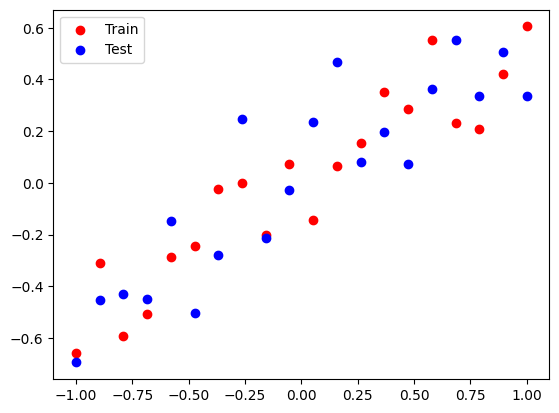

In [35]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

### Regression Example without Dropout

In [36]:
model = Sequential([
    layers.Dense(128, activation='relu', input_dim=1),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='linear')
    
])

In [37]:
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])


In [38]:
history = model.fit(X_train, y_train, epochs=500, verbose=1, validation_data=(X_test, y_test))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1153 - mse: 0.1153 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0492 - val_mse: 0.0492
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 0.0391 - mse: 0.0391 - val_loss: 0.0357 - val_mse: 0.0357
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0390 - val_mse: 0.0390
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 0.0171 -

In [39]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0036815244238823652, Test: 0.04521111771464348


In [40]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


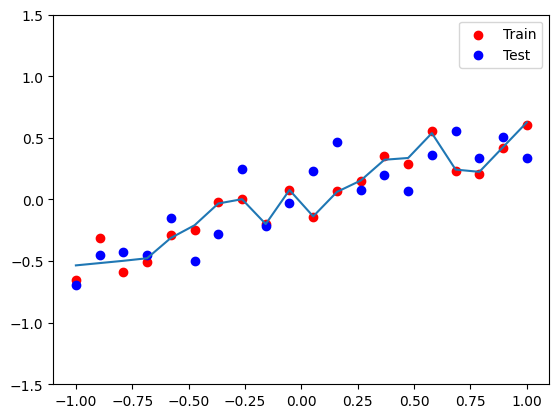

In [41]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

### Regression Example with Dropout

In [42]:
model = Sequential([
    layers.Dense(128, activation='relu', input_dim=1),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='linear')

])

c:\Users\Ali Baba\miniconda3\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mse'])
history = model.fit(X_train, y_train, epochs=500, verbose=1, validation_data=(X_test,y_test))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1258 - mse: 0.1258 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0434 - val_mse: 0.0434
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 0.0342 - mse: 0.0342 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 0.0172 -

In [48]:
_, train_mse_do = model.evaluate(X_train, y_train)
_, test_mse_do = model.evaluate(X_test, y_test)
print('Train: {}, Test: {}'.format(train_mse_do, test_mse_do))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0116 - mse: 0.0116
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0375 - mse: 0.0375
Train: 0.011559581384062767, Test: 0.03754256293177605


In [49]:
y_pred_do_20 = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


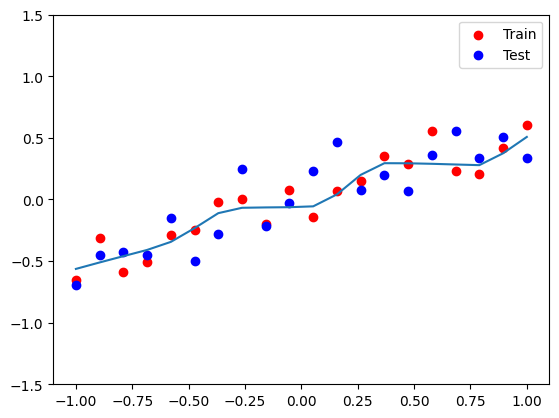

In [50]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_do_20)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

### Regression Example with Dropout (50%)

In [54]:
model = Sequential([
    layers.Dense(128, activation='relu', input_dim=1),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='linear')

])
model.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mse'])
history = model.fit(X_train, y_train, epochs=500, verbose=0, validation_data=(X_test,y_test))
_, train_mse_do_50 = model.evaluate(X_train, y_train)
_, test_mse_do_50 = model.evaluate(X_test, y_test)
print('Train: {}, Test: {}'.format(train_mse_do_50, test_mse_do_50))
y_pred_do_50 = model.predict(X_test)



c:\Users\Ali Baba\miniconda3\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0143 - mse: 0.0143
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0318 - mse: 0.0318
Train: 0.014329029247164726, Test: 0.03182235360145569
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


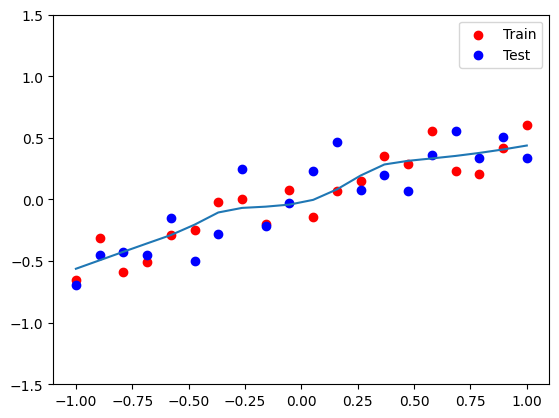

In [55]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_do_50)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

- Overall, dropout is a simple yet effective technique to improve the generalization of neural networks, especially in scenarios where overfitting is a concern.
Observation:
- Increasing the dropout rate from 20% to 50% further reduces overfitting, as evidenced by the closer training and testing MSE values.
